<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg" />
</center> 
     
## <center>  [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

#### <center> Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko) 

# <center>Assignment #3. Spring 2019
## <center> Part 3. Gradient boosting

**In this assignment, you're asked to beat a baseline in the ["Flight delays" competition](https://www.kaggle.com/c/flight-delays-fall-2018).**

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)

 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/video](https://mlcourse.ai/video) 

### Your task is to:
 1. beat **"A3 baseline (8 credits)"** on Public LB (**0.73449** LB score)
 2. rename your [team](https://www.kaggle.com/c/flight-delays-fall-2018/team) in full accordance with the course rating
 
 This task is intended to be relatively easy. Here you are not required to upload your reproducible solution.
 
### <center> Deadline for A3: 2019 March 31, 20:59 GMT (London time)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import roc_auc_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from scipy.sparse import csr_matrix, hstack
import lightgbm as lgb
%matplotlib inline

In [2]:
train_df = pd.read_csv('data/flight-delays-fall-2018/flight_delays_train.csv')
test_df = pd.read_csv('data/flight-delays-fall-2018/flight_delays_test.csv')

Given flight departure time, carrier's code, departure airport, destination location, and flight distance, you have to predict departure delay for more than 15 minutes. As the simplest benchmark, let's take logistic regression and two features that are easiest to take: DepTime and Distance. This will correspond to **"simple logit baseline"** on Public LB.

In [3]:
X_train, y_train = train_df[['Distance', 'DepTime']].values, \
                   train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test_df[['Distance', 'DepTime']].values

X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=17)

In [4]:
logit_pipe = Pipeline([('scaler', StandardScaler()),
                       ('logit', LogisticRegression(C=1, random_state=17, solver='liblinear'))])

In [5]:
logit_pipe.fit(X_train_part, y_train_part)
logit_valid_pred = logit_pipe.predict_proba(X_valid)[:, 1]

roc_auc_score(y_valid, logit_valid_pred)

0.6795691465352607

In [9]:
logit_pipe.fit(X_train, y_train)
logit_test_pred = logit_pipe.predict_proba(X_test)[:, 1]

pd.Series(logit_test_pred, 
          name='dep_delayed_15min').to_csv('logit_2feat.csv', 
                                           index_label='id', header=True)

Now you have to beat **"A3 baseline (8 credits) - 0.73449"** on Public LB. It's not challenging at all. Go for LightGBM, maybe some other models (or ensembling) as well. Include categorical features, do some simple feature engineering as well. Good luck!

-----

In [320]:
num_round = 200
sets = [bibin_feat[:id_split], time_feat[:id_split]]
X_train = hstack(sets).tocsr()
X_test = hstack([bibin_feat[id_split:], time_feat[id_split:]]).tocsr()

X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=17)

lgb_x_train_part = lgb.Dataset(X_train_part.astype(np.float32), 
                           label=y_train_part)

lgb_x_valid = lgb.Dataset(X_valid.astype(np.float32), 
                      label=y_valid)

lgb.cv(params=param,lgb_x_train_part, num_boost_round=10000, early_stopping_rounds= 500)


bst_lgb = lgb.train(param, lgb_x_train_part, num_round, 
                    valid_sets=[lgb_x_valid], early_stopping_rounds=20)

lgb_pred = np.expm1(bst_lgb.predict(X_valid.astype(np.float32), 
                                    num_iteration=bst_lgb.best_iteration))

[1]	valid_0's auc: 0.702829
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.704294
[3]	valid_0's auc: 0.705041
[4]	valid_0's auc: 0.705822
[5]	valid_0's auc: 0.70615
[6]	valid_0's auc: 0.706115
[7]	valid_0's auc: 0.70614
[8]	valid_0's auc: 0.706318
[9]	valid_0's auc: 0.706365
[10]	valid_0's auc: 0.706943
[11]	valid_0's auc: 0.707308
[12]	valid_0's auc: 0.707753
[13]	valid_0's auc: 0.708021
[14]	valid_0's auc: 0.7086
[15]	valid_0's auc: 0.708766
[16]	valid_0's auc: 0.708892
[17]	valid_0's auc: 0.709004
[18]	valid_0's auc: 0.709024
[19]	valid_0's auc: 0.709002
[20]	valid_0's auc: 0.709255
[21]	valid_0's auc: 0.709314
[22]	valid_0's auc: 0.709498
[23]	valid_0's auc: 0.709616
[24]	valid_0's auc: 0.709824
[25]	valid_0's auc: 0.709831
[26]	valid_0's auc: 0.709971
[27]	valid_0's auc: 0.710258
[28]	valid_0's auc: 0.710501
[29]	valid_0's auc: 0.710859
[30]	valid_0's auc: 0.711427
[31]	valid_0's auc: 0.711583
[32]	valid_0's auc: 0.711964
[33]	valid_0's auc: 0.7

In [321]:
roc_auc_score(y_valid, lgb_pred)

[0.7124621950874203]

In [182]:
lgb_x_train = lgb.Dataset(X_train.astype(np.float32),
                          label=y_train)
num_round = 50
bst_lgb = lgb.train(param, lgb_x_train, num_round)

lgb_test_pred = np.expm1(bst_lgb.predict(X_test.astype(np.float32)))

pd.Series(lgb_test_pred, 
          name='dep_delayed_15min').to_csv('hour_feat_lgb.csv', 
                                           index_label='id', header=True)

-----

- ## Добавить утро-день... 
- ## оставить бинарные car ori dest (route?)
- ## дистанс
- ## другие временные фичи?

In [91]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import roc_auc_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from scipy.sparse import csr_matrix, hstack
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

 ### Usefull methods

In [ ]:
# train['week_high'] = ((train['DayOfWeek'].isin([4, 5, 1, 7]))).astype('int')
# test['week_high'] = ((test['DayOfWeek'].isin([12, 1, 2]))).astype('int')

# test['DayOfWeek'] = test['DayOfWeek'].str[2:].astype('int')

## Input and modify data

In [2]:
train_df = pd.read_csv('data/flight-delays-fall-2018/flight_delays_train.csv')
test_df = pd.read_csv('data/flight-delays-fall-2018/flight_delays_test.csv')

for col in train_df.columns[:3]:
    train_df[col] = train_df[col].map(lambda x: np.int(x.split('-')[1]))
train_df['dep_delayed_15min'] = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0})
train_df.drop(train_df[train_df.DepTime >= 2500].index, inplace=True)
y_train = train_df.dep_delayed_15min.values
id_split = len(train_df)

for col in test_df.columns[:3]:
    test_df[col] = test_df[col].map(lambda x: np.int(x.split('-')[1]))

In [3]:
all_df = pd.concat([train_df.drop('dep_delayed_15min', axis=1), test_df])
id_split = train_df.shape[0]

all_df['Route'] = all_df.apply(lambda ser: ser[-3] + '_' + ser[-2], axis=1)


all_df['DepHour'] = all_df['DepTime'] // 100
all_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

all_df.drop('DepTime', axis=1, inplace=True)

# different weather states
all_df['MonthOrigin'] = all_df.apply(lambda ser: f'{ser[0]}_{ser[4]}', axis=1)

In [4]:
all_df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,Route,DepHour,MonthOrigin
0,8,21,7,AA,ATL,DFW,732,ATL_DFW,19,8_ATL
1,4,20,3,US,PIT,MCO,834,PIT_MCO,15,4_PIT
2,9,2,5,XE,RDU,CLE,416,RDU_CLE,14,9_RDU
3,11,25,6,OO,DEN,MEM,872,DEN_MEM,10,11_DEN
4,10,7,6,WN,MDW,OMA,423,MDW_OMA,18,10_MDW


# Feature creation

## Proportion feat

In [14]:
bi_feat = all_df.iloc[:id_split, [3,4,5,7]]
bi_feat['label'] = train_df.dep_delayed_15min

In [15]:
# prop_feat = pd.DataFrame()
# for col in bi_feat.columns[:-1]:
#     prop_ser = (bi_feat[bi_feat.label == 1][col].value_counts() / \
#                 bi_feat[col].value_counts())
#     prop_feat['prop_' + col] = pd.to_numeric(all_df[col].replace(prop_ser.index, 
#                                                               prop_ser.values), errors='coerce').fillna(0)
#     print('prop_' + col + ' is done')

# prop_feat = StandardScaler().fit_transform(prop_feat.prop_UniqueCarrier.values.reshape(-1,1))

## Route feat visualization

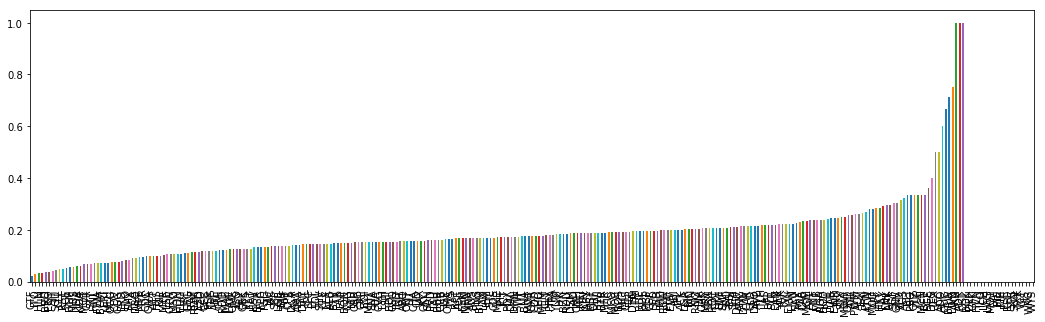

In [16]:
plt.figure(figsize=(18, 5))

(bi_feat[y_train == 1].Origin.value_counts() / \
 bi_feat.Origin.value_counts()).sort_values().plot.bar() # доля тех Origin, у которых label == 1

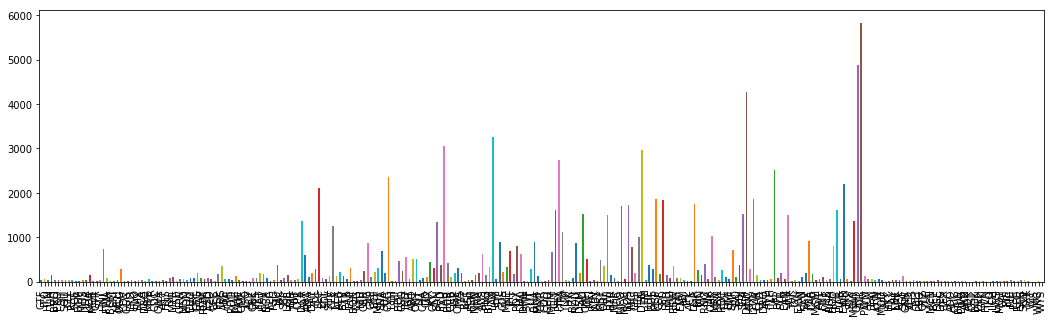

In [17]:
plt.figure(figsize=(18, 5))

ori_id_sorted = (bi_feat[bi_feat.label == 1].Origin.value_counts() / \
                 bi_feat.Origin.value_counts()).sort_values().index

bi_feat.Origin.value_counts()[ori_id_sorted].plot.bar() # плотность всех Origin

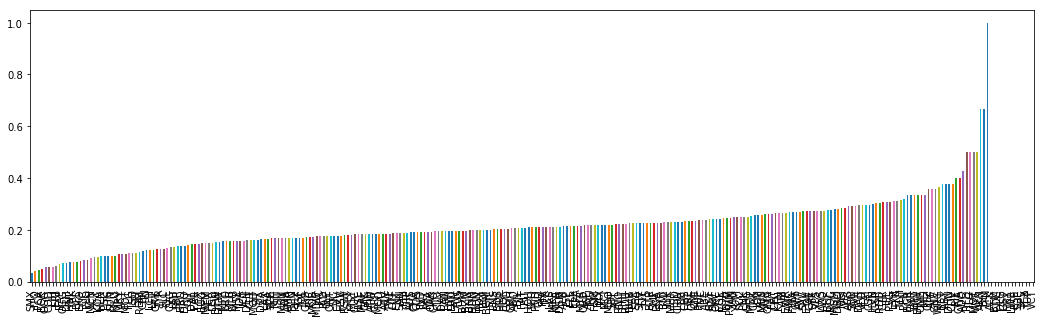

In [18]:
plt.figure(figsize=(18, 5))

(bi_feat[y_train == 1].Dest.value_counts() / \
 bi_feat.Dest.value_counts()).sort_values().plot.bar() # доля тех Dest, у которых label == 1

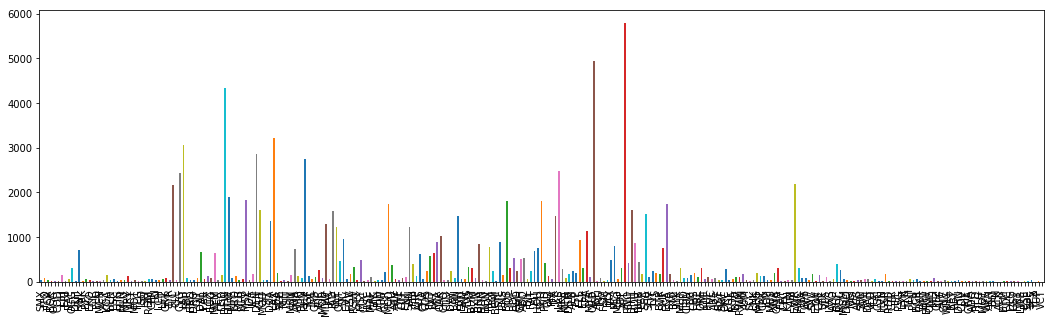

In [19]:
plt.figure(figsize=(18, 5))

dest_id_sorted = (bi_feat[bi_feat.label == 1].Dest.value_counts() / \
                 bi_feat.Dest.value_counts()).sort_values().index

bi_feat.Dest.value_counts()[dest_id_sorted].plot.bar() # плотность всех Dest

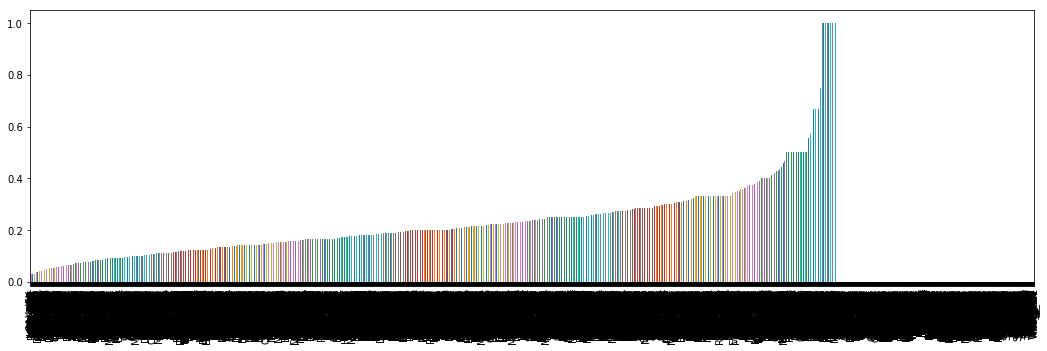

In [20]:
plt.figure(figsize=(18, 5))

dest_sorted = (bi_feat[bi_feat.label == 1].Route.value_counts() / \
                 bi_feat.Route.value_counts()).sort_values()
dest_sorted.plot.bar() # доля тех, у которых label == 1

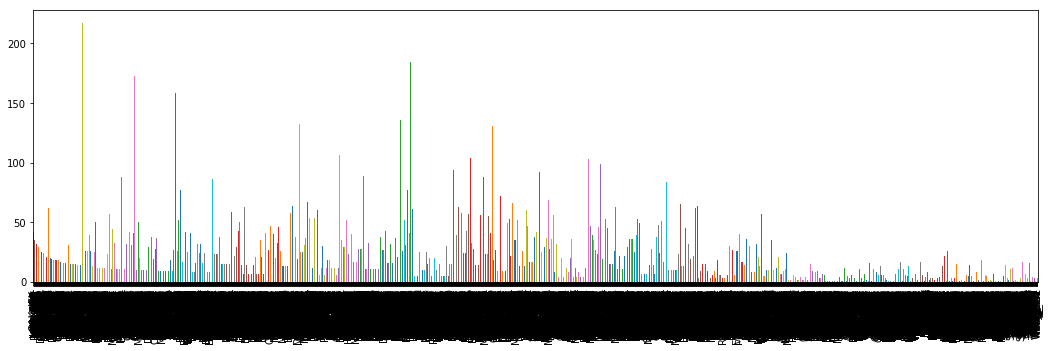

In [21]:
plt.figure(figsize=(18, 5))

bi_feat.Route.value_counts()[dest_sorted.index].plot.bar() # плотность всех Route

## Route and Carrier feat

In [22]:
ori_feat = OneHotEncoder().fit_transform(all_df.Origin.values.reshape(-1,1))
dest_feat = OneHotEncoder().fit_transform(all_df.Dest.values.reshape(-1,1))
route_feat = OneHotEncoder().fit_transform(all_df.Route.values.reshape(-1,1))
carriers_feat = OneHotEncoder().fit_transform(all_df.UniqueCarrier.values.reshape(-1,1))

In [23]:
ori_feat.shape, dest_feat.shape, route_feat.shape, carriers_feat.shape

((199994, 307), (199994, 307), (199994, 5048), (199994, 23))

## Dist feat

In [58]:
dist_feat = StandardScaler().fit_transform(all_df.Distance.values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Time visualization

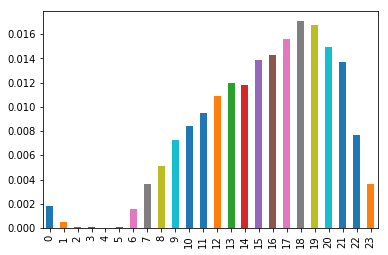

In [25]:
hour_sorted = (all_df.iloc[:id_split][y_train == 1].DepHour.value_counts() / id_split).sort_index()
hour_sorted.plot.bar()

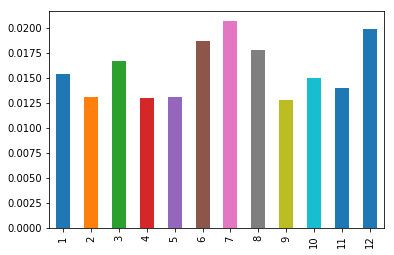

In [26]:
month_sorted = (all_df.iloc[:id_split][y_train == 1].Month.value_counts() / id_split).sort_index()

month_sorted.plot.bar()

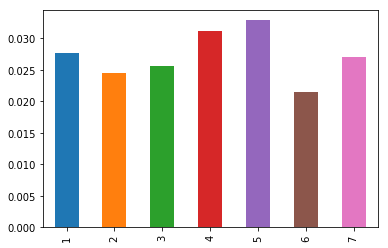

In [27]:
DayOfWeek_sorted = (all_df.iloc[:id_split][y_train == 1].DayOfWeek.value_counts() / id_split).sort_index()

DayOfWeek_sorted.plot.bar()

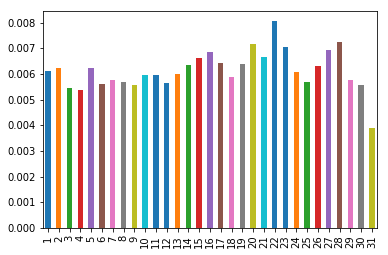

In [28]:
DayofMonth_sorted = (all_df.iloc[:id_split][y_train == 1].DayofMonth.value_counts() / id_split).sort_index()

DayofMonth_sorted.plot.bar()

## Time feat

In [75]:
session_start_hour = all_df.DepHour
day_feat = pd.DataFrame()

day_feat['morning'] = ((session_start_hour >= 5) & (session_start_hour <= 11)).astype('int')
day_feat['day'] = ((session_start_hour >= 12) & (session_start_hour <= 17)).astype('int')
day_feat['evening'] = ((session_start_hour >= 18) & (session_start_hour <= 23)).astype('int')
day_feat['night'] = ((session_start_hour >= 0) & (session_start_hour <= 3)).astype('int')

day_feat = day_feat.values


seasons_feat = pd.get_dummies(all_df.Month.map({x:y for x,y in zip(list(range(1,13)), 
                                                    [1,1,2,2,2,3,3,3,4,4,4,1])}), prefix='season')
seasons_feat = seasons_feat.values

place_feat = OneHotEncoder().fit_transform(all_df.MonthOrigin.values.reshape(-1,1))

In [30]:
dep_hour_feat = StandardScaler().fit_transform(all_df.DepHour.values.reshape(-1,1))
dep_hour_bin_feat = OneHotEncoder().fit_transform(all_df.DepHour.values.reshape(-1,1))
full_time_feat = OneHotEncoder().fit_transform(all_df.iloc[:, :3])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
full_time_feat.shape, dep_hour_bin_feat.shape

((199994, 50), (199994, 24))

In [32]:
all_df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,Route,DepHour,MonthOrigin
0,8,21,7,AA,ATL,DFW,732,ATL_DFW,19,8_ATL
1,4,20,3,US,PIT,MCO,834,PIT_MCO,15,4_PIT
2,9,2,5,XE,RDU,CLE,416,RDU_CLE,14,9_RDU
3,11,25,6,OO,DEN,MEM,872,DEN_MEM,10,11_DEN
4,10,7,6,WN,MDW,OMA,423,MDW_OMA,18,10_MDW


## Setting X and y

In [137]:
many_feat = [
    dep_hour_feat,
    dep_hour_bin_feat,
    full_time_feat,
    seasons_feat,
    ori_feat,
    dest_feat,
    carriers_feat,
    dist_feat,
    day_feat,
#     place_feat,
#     route_feat,
#     prop_feat,
]

many_feat_names = [
    'dep_hour_feat',
    'dep_hour_bin_feat',
    'full_time_feat',
    'seasons_feat',
    'ori_feat',
    'dest_feat',
    'carriers_feat',
    'dist_feat',
    'day_feat',
#     'place_feat',
#     'route_feat',
#     'prop_feat',
]

All_feat_names = []
for rrr,kkk in zip(many_feat, many_feat_names):
    All_feat_names += [f'{kkk}_{x}' for x in range(rrr.shape[1])]

In [143]:
X_train = hstack([x[:id_split] for x in many_feat]).todense()#.tocsr()
X_test  = hstack([x[id_split:] for x in many_feat]).todense()#.tocsr()

[x.shape[1] for x in many_feat], X_train.shape, X_test.shape, 

([1, 24, 50, 4, 307, 307, 23, 1, 4], (99994, 721), (100000, 721))

## Model training

In [123]:
param = {'num_leaves': 200, 
         'objective': 'binary',
         'metric': 'auc', 
         'verbosity' : 0, 
         'max_depth': -1, 
         'learning_rate': 0.01, 
         'reg_alpha': 0.01, 
         'reg_lambda': 3}

def scoring(X_train, y_train, num_round=2000, verbose_eval=200, early_stopping_rounds=400, param=param):
    X_train_part, X_valid, y_train_part, y_valid = \
        train_test_split(X_train, y_train, 
                         test_size=0.3, random_state=17)

    lgb_x_train_part = lgb.Dataset(X_train_part.astype(np.float32), 
                               label=y_train_part)

    lgb_x_valid = lgb.Dataset(X_valid.astype(np.float32), 
                          label=y_valid)
    # train model
    bst_lgb = lgb.train(param, lgb_x_train_part, num_round, 
                        valid_sets=[lgb_x_valid], 
                        early_stopping_rounds=early_stopping_rounds, 
                        verbose_eval=verbose_eval,)

    lgb_pred = bst_lgb.predict(X_valid.astype(np.float32), 
                                        num_iteration=bst_lgb.best_iteration)

    return roc_auc_score(y_valid, lgb_pred)

# def old_cv_scoring(X_train, y_train, num_round=1000, verbose_eval=200, early_stopping_rounds=200, param=param):
#     lgb_x_train = lgb.Dataset(X_train.astype(np.float32), label=y_train)
    
#     cv_scores = lgb.cv(param, lgb_x_train, num_round, 
#                        early_stopping_rounds=early_stopping_rounds, 
#                        verbose_eval=verbose_eval, 
#                        metrics='auc', )
#     return cv_scores

def cv_scoring(X_train, y_train, X_test=None, num_round=1000, early_stopping_rounds=200, 
               verbose_eval=400, param=param, nfolds=5):
    
    if X_test.shape[0]:
        predict = np.zeros(X_test.shape[0])
        
    oof = np.zeros(X_train.shape[0])
    folds = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=870)
    for fold_, (ind_trn, ind_valid) in enumerate(folds.split(X_train, y_train)):
        print("Fold {}".format(fold_))

        X_train_lgbm = lgb.Dataset(X_train[ind_trn], y_train[ind_trn])
        X_valid_lgbm = lgb.Dataset(X_train[ind_valid], y_train[ind_valid])

        clf = lgb.train(param, X_train_lgbm, num_round, 
                             valid_sets=[X_valid_lgbm], 
                             early_stopping_rounds=early_stopping_rounds, 
                             verbose_eval=verbose_eval)
        oof[ind_valid] = clf.predict(X_train[ind_valid], num_iteration = clf.best_iteration)
        if X_test.shape[0]:
            pred = clf.predict(X_test, num_iteration=clf.best_iteration) / nfolds
            predict += pred  
    print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    if X_test.shape[0]:
        return np.array(predict)

In [288]:
scores = []
for tmp_X in many_feat[-2:]:
    scores.append(cv_scoring(tmp_X[:id_split], y_train,))
    print('-'*80)

[200]	cv_agg's auc: 0.549656 + 0.00607581
--------------------------------------------------------------------------------
[200]	cv_agg's auc: 0.549656 + 0.00607581
--------------------------------------------------------------------------------


In [293]:
scores[0]

{'auc-mean': [0.5496560427743884], 'auc-stdv': [0.006075810607677147]}

In [36]:
sss = cv_scoring(X_train, y_train, 2000, 200, 100)

[200]	cv_agg's auc: 0.734389 + 0.00131118
[400]	cv_agg's auc: 0.744776 + 0.000910844
[600]	cv_agg's auc: 0.747947 + 0.000998689
[800]	cv_agg's auc: 0.748998 + 0.00107421
[1000]	cv_agg's auc: 0.749576 + 0.0012757
[1200]	cv_agg's auc: 0.749669 + 0.00147496


In [128]:
print('All X')
sss = cv_scoring(X_train, y_train, X_test, num_round=2000,)

All X
Fold 0
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's auc: 0.748882
[800]	valid_0's auc: 0.752422
Early stopping, best iteration is:
[989]	valid_0's auc: 0.752668
Fold 1
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's auc: 0.747103
[800]	valid_0's auc: 0.751007
Early stopping, best iteration is:
[886]	valid_0's auc: 0.751173
Fold 2
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's auc: 0.740673
[800]	valid_0's auc: 0.744021
[1200]	valid_0's auc: 0.744363
Early stopping, best iteration is:
[1096]	valid_0's auc: 0.744629
Fold 3
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's auc: 0.743885
[800]	valid_0's auc: 0.74856
[1200]	valid_0's auc: 0.749017
Early stopping, best iteration is:
[1254]	valid_0's auc: 0.74911
Fold 4
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's auc: 0.736531
[800]	valid_0's auc: 0.740892
[1200]	valid_0's auc: 

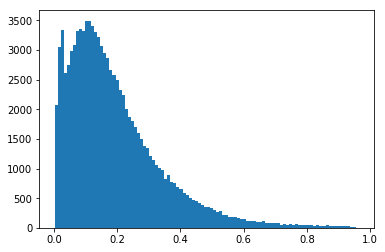

In [129]:
_ = plt.hist(sss, bins=100)

In [409]:
for i in range(len(many_feat)):
    a = list(range(len(many_feat)))
    a.remove(i)
    tmp_X = hstack([many_feat[j][:id_split] for j in a]).tocsr()
    print(many_feat_names[i])
    print(tmp_X.shape[1])
    sss = cv_scoring(tmp_X, y_train, 1000, 100, 200)
    print('-'*80)

dep_hour_feat
715
[100]	cv_agg's auc: 0.725796 + 0.00107683
[200]	cv_agg's auc: 0.734289 + 0.00143604
[300]	cv_agg's auc: 0.740877 + 0.00142486
[400]	cv_agg's auc: 0.744962 + 0.00147879
[500]	cv_agg's auc: 0.746941 + 0.00142739
[600]	cv_agg's auc: 0.748065 + 0.00140294
[700]	cv_agg's auc: 0.748722 + 0.00149274
[800]	cv_agg's auc: 0.749098 + 0.00169632
[900]	cv_agg's auc: 0.749355 + 0.00176718
[1000]	cv_agg's auc: 0.7495 + 0.00194418
--------------------------------------------------------------------------------
dep_hour_bin_feat
692
[100]	cv_agg's auc: 0.724898 + 0.00175737
[200]	cv_agg's auc: 0.731938 + 0.00224859
[300]	cv_agg's auc: 0.73724 + 0.00250334
[400]	cv_agg's auc: 0.741744 + 0.00194205
[500]	cv_agg's auc: 0.744537 + 0.00197836
[600]	cv_agg's auc: 0.746099 + 0.00176297
[700]	cv_agg's auc: 0.746884 + 0.00172787
[800]	cv_agg's auc: 0.747332 + 0.00172399
[900]	cv_agg's auc: 0.747651 + 0.00174809
[1000]	cv_agg's auc: 0.747856 + 0.0016951
-----------------------------------------

KeyboardInterrupt: 

In [361]:
list(map(lambda x: np.max(x['auc-mean']), gcv))

[0.742817067590621, 0.7443364217034052, 0.7452700745729179, 0.741001320838275]

In [267]:
# param = {'num_leaves': 100, 
#          'objective': 'binary',
#          'metric': 'auc', 
#          'verbosity' : 0, 
#          'min_data_in_leaf' : 80,
#          'max_depth': -1, 
#          'learning_rate': 0.01}


gcv = []
Maxes = []
for nl in [200, 300, 600]:
    for lr in [.1, .05, .01, ]:
        param['num_leaves'] = nl
        param['learning_rate'] = lr
        print(f'num_leaves = {nl} learning_rate = {lr}')
        
        sss = cv_scoring(X_train, y_train, verbose_eval=400, param=param)
        gcv.append(sss)
        mmm = np.max(sss['auc-mean'])
        Maxes.append(mmm)
        print(f"max is {mmm}")
        print('-'*70)

num_leaves = 200 learning_rate = 0.1
max is 0.742817067590621
----------------------------------------------------------------------
num_leaves = 200 learning_rate = 0.05
[400]	cv_agg's auc: 0.741567 + 0.00214322
max is 0.7443364217034052
----------------------------------------------------------------------
num_leaves = 200 learning_rate = 0.01
[400]	cv_agg's auc: 0.740592 + 0.00171093
[800]	cv_agg's auc: 0.745129 + 0.00153266
max is 0.7452700745729179
----------------------------------------------------------------------
num_leaves = 300 learning_rate = 0.1
max is 0.741001320838275
----------------------------------------------------------------------
num_leaves = 300 learning_rate = 0.05


KeyboardInterrupt: 

In [80]:
lgb_x_train = lgb.Dataset(X_train.astype(np.float32), 
                           label=y_train)

bst_lgb = lgb.train(param, lgb_x_train, 1000, verbose_eval=200, )

In [81]:
pd.DataFrame(bst_lgb.feature_importance(),
             index=All_feat_names,
             columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
dist_feat_0,31621
dep_hour_feat_0,16908
full_time_feat_47,2287
carriers_feat_20,2016
full_time_feat_48,2009
full_time_feat_44,1838
full_time_feat_46,1830
full_time_feat_43,1776
full_time_feat_45,1633
full_time_feat_49,1577


In [82]:
lgb_pred = bst_lgb.predict(X_test.astype(np.float32), 
                                    num_iteration=bst_lgb.best_iteration)

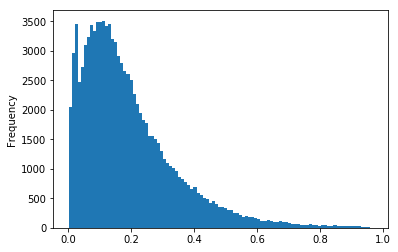

In [83]:
pd.Series(lgb_pred).plot.hist(bins=100)

In [130]:
pd.Series(sss, 
          name='dep_delayed_15min').to_csv('full_lgb.csv', 
                                           index_label='id', header=True)

In [372]:
# WO seasons
lgb_x_train = lgb.Dataset(X_train.astype(np.float32), 
                           label=y_train)

bst_lgb = lgb.train(param, lgb_x_train, 1000, verbose_eval=200, )

pd.DataFrame(bst_lgb.feature_importance(),
             index=All_feat_names,
             columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
dist_feat_0,35326
dep_hour_feat_0,21229
full_time_feat_47,2414
day_feat_1,2267
carriers_feat_20,2197
full_time_feat_49,2101
full_time_feat_43,2022
full_time_feat_46,2004
full_time_feat_48,1886
full_time_feat_44,1783


In [373]:
lgb_pred = bst_lgb.predict(X_test.astype(np.float32), 
                                    num_iteration=bst_lgb.best_iteration)

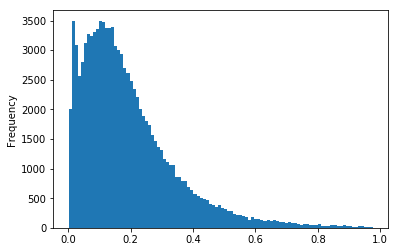

In [374]:
pd.Series(lgb_pred).plot.hist(bins=100)

In [338]:
pd.Series(lgb_pred, 
          name='dep_delayed_15min').to_csv('full_lgb.csv', 
                                           index_label='id', header=True)

# CatBoost

In [131]:
from catboost import CatBoostClassifier, Pool, cv

In [180]:
all_df['Season'] = all_df.Month.map({x:y for x,y in zip(list(range(1,13)), 
                                                    [1,1,2,2,2,3,3,3,4,4,4,1])})
all_df['DayPart'] = all_df.DepHour.map({x:y for x,y in zip(list(range(24)), 
                                                    [1,1,1,1,1,1, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4,4, 5,5])})

all_df.drop('Route', axis=1, inplace=True)

In [182]:
all_df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,DepHour,MonthOrigin,Season,DayPart
0,8,21,7,AA,ATL,DFW,732,19,8_ATL,3,4
1,4,20,3,US,PIT,MCO,834,15,4_PIT,2,4
2,9,2,5,XE,RDU,CLE,416,14,9_RDU,4,3
3,11,25,6,OO,DEN,MEM,872,10,11_DEN,4,2
4,10,7,6,WN,MDW,OMA,423,18,10_MDW,4,4


In [183]:
all_df.shape

(199994, 11)

In [184]:
categorical_features_indices = np.array([0,1,2,3,4,5,8,9,10])
# np.where(all_df.dtypes != np.float)[0]
X_train = all_df[:id_split]
X_test = all_df[id_split:]
y_train = pd.Series(y_train)

In [ ]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=67)

In [211]:
def CB_cv_scoring(X_train, y_train, X_test=None, nfolds=5):
    
    if X_test.shape[0]:
        predict = np.zeros(X_test.shape[0])
        
    oof = np.zeros(X_train.shape[0])
    folds = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=870)
    for fold_, (ind_trn, ind_valid) in enumerate(folds.split(X_train, y_train)):
        print("Fold {}".format(fold_))

        clf = CatBoostClassifier(
            custom_loss=['AUC'],
            random_seed=42,
            logging_level='Silent',
            early_stopping_rounds=200,
        #     learning_rate=0.1,  
        )
        
        clf.fit(
            X_train.iloc[ind_trn], y_train.iloc[ind_trn],
            cat_features=categorical_features_indices,
            eval_set=(X_valid, y_valid),
        #     logging_level='Verbose',  # you can uncomment this for text output
#             plot=True
        );

        oof[ind_valid] = clf.predict_proba(X_train.iloc[ind_valid],)[:, 1]
        if X_test.shape[0]:
            pred = clf.predict_proba(X_test)[:,1] / nfolds
            predict += pred  
    print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    if X_test.shape[0]:
        return np.array(predict)

In [212]:
%%time
cbpr = CB_cv_scoring(X_train, y_train, X_test)

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
CV score: 0.75985 
CPU times: user 48min 51s, sys: 2min 8s, total: 51min
Wall time: 14min 6s


In [192]:
model = CatBoostClassifier(
    custom_loss=['AUC'],
    random_seed=42,
    logging_level='Silent',
    early_stopping_rounds=200,
#     learning_rate=0.1,  
)

In [191]:
model.fit(
    X_train_part, y_train_part,
    cat_features=categorical_features_indices,
    eval_set=(X_valid, y_valid),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [193]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

CB_pred_probs = model.predict_proba(X_test)[:, 1]

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

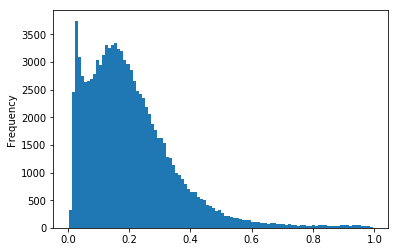

In [195]:
pd.Series(CB_pred_probs).plot.hist(bins=100)

In [214]:
pd.Series(cbpr, 
          name='dep_delayed_15min').to_csv('catboost_cv.csv', 
                                           index_label='id', header=True)

### Mix of boosters

In [215]:
catb = pd.read_csv('catboost_cv.csv', index_col='id').values
LBG = pd.read_csv('/home/mr/Downloads/full_lgb.csv', index_col='id').values

In [218]:
mix = LBG * 0.6 + catb * 0.4
mix.shape

(100000, 1)

In [219]:
pd.Series(mix.reshape(mix.shape[0]), 
          name='dep_delayed_15min').to_csv('3rd_mix_of best.csv', 
                                           index_label='id', header=True)

### OLD

In [378]:
# def new_scoring(X_train, y_train):
#     X_train_part, X_valid, y_train_part, y_valid = \
#         train_test_split(X_train, y_train, 
#                          test_size=0.3, random_state=17)
    
param_grid = {
#               'num_leaves': [80, 120],
#               'learning_rate': np.logspace(-2, 0.5, 4), 
#               'n_estimators': [50, 100, 200], 
              'reg_alpha': np.logspace(-2, 0.5, 2), 
              'reg_lambda': np.logspace(-2, 0.5, 2),
             }

lgb_clf = LGBMClassifier(random_state=17, max_depth=-1, num_leaves=200, learning_rate=0.01, )
grid_searcher = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, 
                         cv=5, n_jobs=3, verbose=True, scoring='roc_auc')

grid_searcher.fit(X_train, y_train)

#     return accuracy_score(y_valid, lgb_clf.predict(X_valid))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   44.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=200, objective=None,
        random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'reg_alpha': array([0.01   , 3.16228]), 'reg_lambda': array([0.01   , 3.16228])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [376]:
grid_searcher.best_score_, grid_searcher.best_params_

(0.7439245644507119, {'reg_alpha': 0.01, 'reg_lambda': 3.1622776601683795})

In [104]:
lgb_clf = LGBMClassifier(random_state=17, 
                         max_depth=-1, 
                         num_leaves=80, 
                         learning_rate=0.07, 
                         n_estimators=100, 
                         reg_alpha=0.05, 
                         reg_lambda=3.4,)

lgb_clf.fit(X_train, y_train)
lgb_test_pred = lgb_clf.predict_proba(X_test)[:, 1]

In [106]:
pd.Series(lgb_test_pred, 
          name='dep_delayed_15min').to_csv('new_many_feat_lgb_validated.csv', 
                                           index_label='id', header=True)

In [105]:
pd.DataFrame(lgb_clf.feature_importances_,
             index=new_num_feat.columns,
             columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
Distance,1533
prop_Origin,1449
DayofMonth,1334
Month,1100
prop_UniqueCarrier,937
DepHour,886
DayOfWeek,661
